Text(0.5, 0, "v_p'")

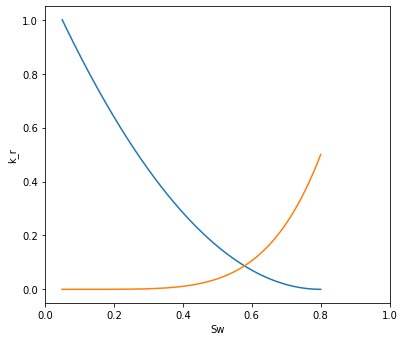

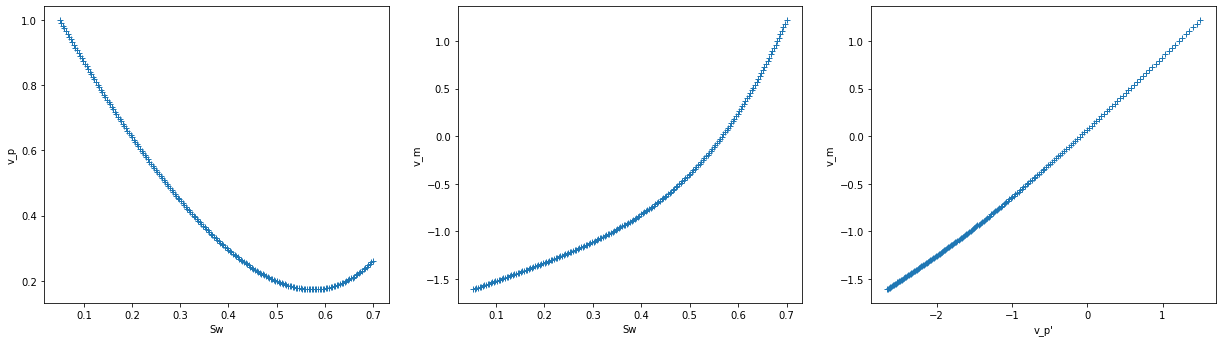

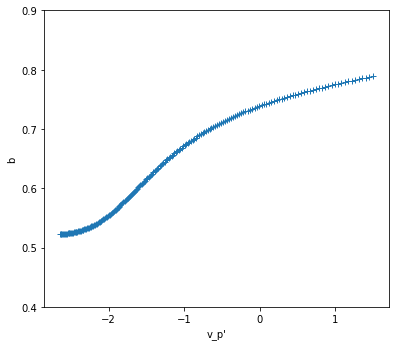

In [29]:
import numpy as np
import matplotlib.pyplot as plt


def krw_Corey(Sw, n, Swi, Sor, Kr0):
    Swn = (Sw - Swi) / (1 - Swi - Sor)
    return Kr0*Swn**n

def kro_Corey(Sw, n, Swi, Sor, Kr0):
    Swn = (Sw - Swi) / (1 - Swi - Sor)
    return Kr0*(1-Swn)**n

def krw_LET(Sw, L, E, T, Swi, Sor, Kr0):
    #Sw = np.linspace(0,1,200)
    Swn = (Sw - Swi) / (1 - Swi - Sor)
    return (Kr0*Swn**L) / (Swn**L + E*(1-Swn)**T)

def kro_LET(Sw, L, E, T, Swi, Sor, Kr0):
    #Swn = (1 - Sw - Sor) / (1 - Swi - Sor)
    Swn = (Sw - Swi) / (1 - Swi - Sor)
    return (Kr0*(1-Swn)**L) / ((1-Swn)**L + E*Swn**T)



visc_water = 1
visc_oil = 1

corey_exp_water = 5
corey_exp_oil = 2

Sorw = 0.2
Swi = 0.05
kr0_water = 0.5
kr0_oil = 1

sw = np.linspace(0.7, 0.05, 200)
sw2 = np.linspace(1-Sorw, Swi, 200)


v_p = (krw_Corey(sw, corey_exp_water, Swi, Sorw, kr0_water)/visc_water + 
       kro_Corey(sw, corey_exp_oil, Swi, Sorw, kr0_oil)/visc_oil)
dv_p = np.diff(v_p)/np.diff(sw)

v_m = (sw[:-1] / visc_water * (np.diff(krw_Corey(sw, corey_exp_water, Swi, Sorw, kr0_water) / sw) / np.diff(sw)) + 
        (1-sw[:-1]) / visc_oil * (np.diff(kro_Corey(sw, corey_exp_oil, Swi, Sorw, kr0_oil) / (1-sw)) / np.diff(sw)))

dv_m = np.diff(v_m)/np.diff(dv_p)


plt.figure(figsize=(21,12))
plt.subplot(231)
plt.plot(sw2, kro_Corey(sw2, corey_exp_oil, Swi, Sorw, kr0_oil))
plt.plot(sw2, krw_Corey(sw2, corey_exp_water, Swi, Sorw, kr0_water))
plt.xlim(0,1)
plt.ylabel("k_r")
plt.xlabel("Sw")

plt.figure(figsize=(21,12))
plt.subplot(231)
plt.plot(sw, v_p, '+')
plt.ylabel("v_p")
plt.xlabel("Sw")

plt.subplot(232)
plt.plot(sw[:-1], v_m, '+')
plt.ylabel("v_m")
plt.xlabel("Sw")

plt.subplot(233)
plt.plot(dv_p, v_m, '+')
plt.ylabel("v_m")
plt.xlabel("v_p'")

plt.figure(figsize=(21,12))
plt.subplot(231)
plt.plot(dv_p[:-1], dv_m, '+')
plt.ylim(0.4,0.9)
plt.ylabel("b")
plt.xlabel("v_p'")



Text(0.5, 0, "v_p'")

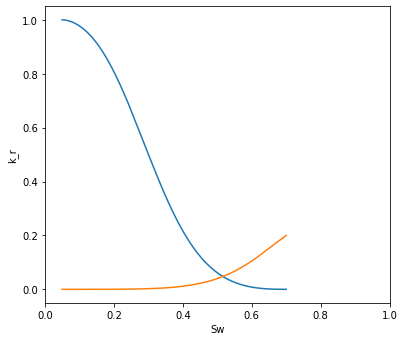

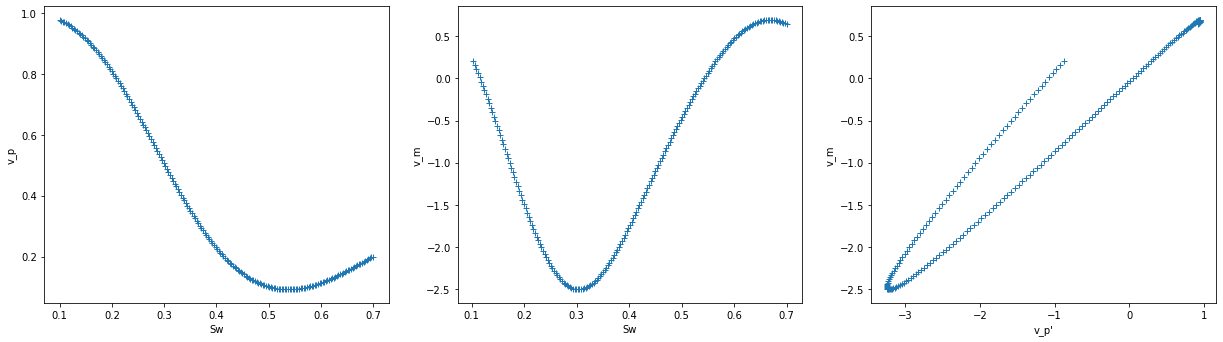

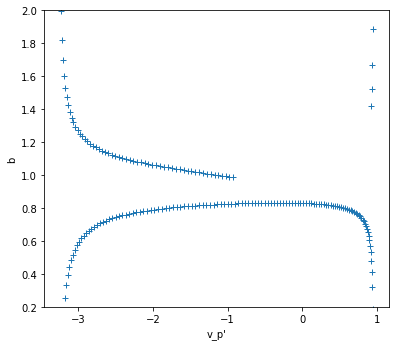

In [21]:
## LET parameterization
## https://frode54.wordpress.com/wp-content/uploads/2018/03/sca2005-32-kr-lomeland-et-al.pdf

visc_water = 1
visc_oil = 1

## Water parameters
L_w = 4
E_w = 3
T_w = 1

## Oil parameters
L_o = 2.5
E_o = 1.5
T_o = 1.7


Sorw = 0.3
Swi = 0.05
kr0_water = 0.2
kr0_oil = 1

sw = np.linspace(0.7, 0.1, 200)
sw2 = np.linspace(1-Sorw, Swi, 200)


v_p = (krw_LET(sw, L_w, E_w, T_w, Swi, Sorw, kr0_water)/visc_water + 
       kro_LET(sw, L_o, E_o, T_o, Swi, Sorw, kr0_oil)/visc_oil)
dv_p = np.diff(v_p)/np.diff(sw)

v_m = (sw[:-1] / visc_water * (np.diff(krw_LET(sw, L_w, E_w, T_w, Swi, Sorw, kr0_water) / sw) / np.diff(sw)) + 
        (1-sw[:-1]) / visc_oil * (np.diff(kro_LET(sw, L_o, E_o, T_o, Swi, Sorw, kr0_oil) / (1-sw)) / np.diff(sw)))

dv_m = np.diff(v_m)/np.diff(dv_p)


plt.figure(figsize=(21,12))
plt.subplot(231)
plt.plot(sw2, kro_LET(sw2, L_o, E_o, T_o, Swi, Sorw, kr0_oil))
plt.plot(sw2, krw_LET(sw2, L_w, E_w, T_w, Swi, Sorw, kr0_water))
plt.xlim(0,1)
plt.ylabel("k_r")
plt.xlabel("Sw")

plt.figure(figsize=(21,12))
plt.subplot(231)
plt.plot(sw, v_p, '+')
plt.ylabel("v_p")
plt.xlabel("Sw")

plt.subplot(232)
plt.plot(sw[:-1], v_m, '+')
plt.ylabel("v_m")
plt.xlabel("Sw")

plt.subplot(233)
plt.plot(dv_p, v_m, '+')
plt.ylabel("v_m")
plt.xlabel("v_p'")

plt.figure(figsize=(21,12))
plt.subplot(231)
plt.plot(dv_p[:-1], dv_m, '+')
plt.ylim(0.2,2)
plt.ylabel("b")
plt.xlabel("v_p'")






Text(0.5, 0, "v_p'")

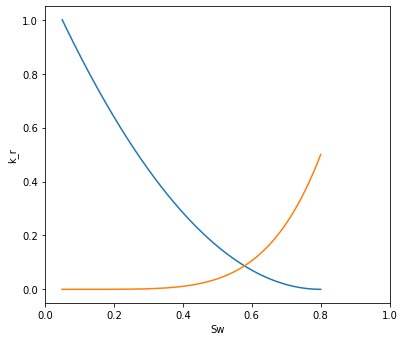

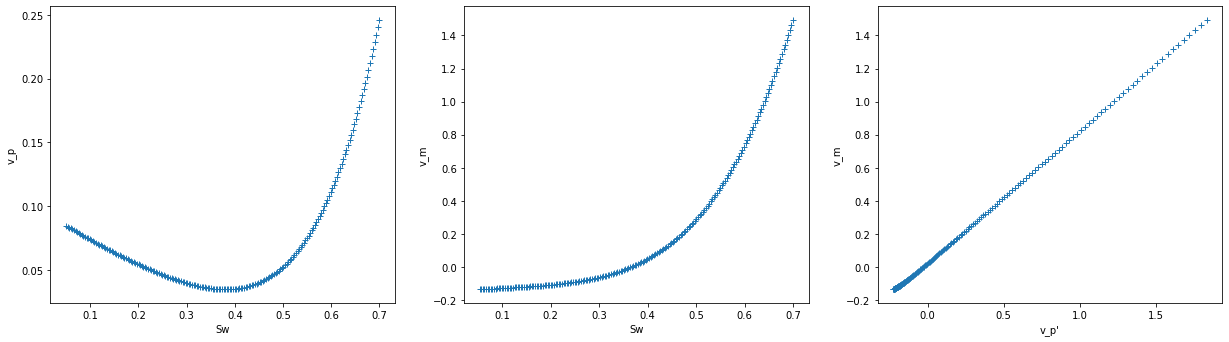

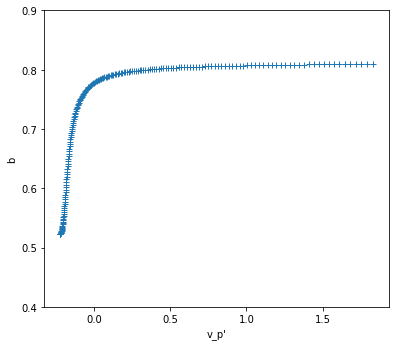

In [28]:
# Fig 1 analogue 
# Roy, S., Pedersen, H., Sinha, S., & Hansen, A. (2022). 
# The co-moving velocity in immiscible two-phase flow in porous media. 
# Transport in Porous Media, 143(1), 69-102.


visc_water = 1
visc_oil = 11.8

corey_exp_water = 5
corey_exp_oil = 2

Sorw = 0.2
Swi = 0.05
kr0_water = 0.5
kr0_oil = 1

sw = np.linspace(0.7, 0.05, 200)
sw2 = np.linspace(1-Sorw, Swi, 200)


v_p = (krw_Corey(sw, corey_exp_water, Swi, Sorw, kr0_water)/visc_water + 
       kro_Corey(sw, corey_exp_oil, Swi, Sorw, kr0_oil)/visc_oil)
dv_p = np.diff(v_p)/np.diff(sw)

v_m = (sw[:-1] / visc_water * (np.diff(krw_Corey(sw, corey_exp_water, Swi, Sorw, kr0_water) / sw) / np.diff(sw)) + 
        (1-sw[:-1]) / visc_oil * (np.diff(kro_Corey(sw, corey_exp_oil, Swi, Sorw, kr0_oil) / (1-sw)) / np.diff(sw)))

dv_m = np.diff(v_m)/np.diff(dv_p)


plt.figure(figsize=(21,12))
plt.subplot(231)
plt.plot(sw2, kro_Corey(sw2, corey_exp_oil, Swi, Sorw, kr0_oil))
plt.plot(sw2, krw_Corey(sw2, corey_exp_water, Swi, Sorw, kr0_water))
plt.xlim(0,1)
plt.ylabel("k_r")
plt.xlabel("Sw")

plt.figure(figsize=(21,12))
plt.subplot(231)
plt.plot(sw, v_p, '+')
plt.ylabel("v_p")
plt.xlabel("Sw")

plt.subplot(232)
plt.plot(sw[:-1], v_m, '+')
plt.ylabel("v_m")
plt.xlabel("Sw")

plt.subplot(233)
plt.plot(dv_p, v_m, '+')
plt.ylabel("v_m")
plt.xlabel("v_p'")

plt.figure(figsize=(21,12))
plt.subplot(231)
plt.plot(dv_p[:-1], dv_m, '+')
plt.ylim(0.4,0.9)
plt.ylabel("b")
plt.xlabel("v_p'")

